In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
mnist = tf.keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [5]:
train_data = train_data / 255
test_data = test_data / 255

In [6]:
train_data = tf.expand_dims(train_data, -1)
test_data = tf.expand_dims(test_data, -1)

In [7]:
train_data[0].shape

TensorShape([28, 28, 1])

In [8]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.98):
      print('99% accuracy reached, stopping training.')
      self.model.stop_training = True

callback = MyCallback()

In [9]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_datagen.fit(train_data)
test_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen.fit(test_data)

In [10]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(train_datagen.flow(train_data, train_labels),
                    epochs=10,
                    validation_data=(test_datagen.flow(test_data,test_labels)),
                    callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 106s 56ms/step - loss: 1.2112 - accuracy: 0.5763 - val_loss: 0.7832 - val_accuracy: 0.7333
Epoch 2/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.7232 - accuracy: 0.7584 - val_loss: 0.6129 - val_accuracy: 0.7958
Epoch 3/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.5902 - accuracy: 0.8044 - val_loss: 0.5527 - val_accuracy: 0.8175
Epoch 4/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.5278 - accuracy: 0.8272 - val_loss: 0.5031 - val_accuracy: 0.8326
Epoch 5/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.4791 - accuracy: 0.8421 - val_loss: 0.4676 - val_accuracy: 0.8459
Epoch 6/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.4504 - accuracy: 0.8516 - val_loss: 0.4298 - val_accuracy: 0.8576
Epoch 7/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.4356 - accuracy: 0.8575 - val_loss: 0

In [11]:
import matplotlib.pyplot as plt

def plot(history, metric):
  plt.plot(history.history[metric], label=metric)
  plt.plot(history.history['val_'+metric], label='val_'+metric)
  plt.title('Model')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend()

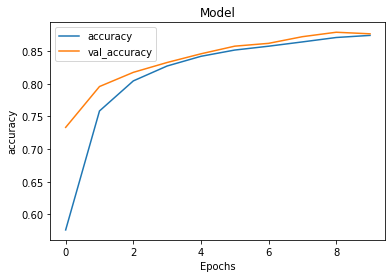

In [12]:
plot(history=history, metric='accuracy')

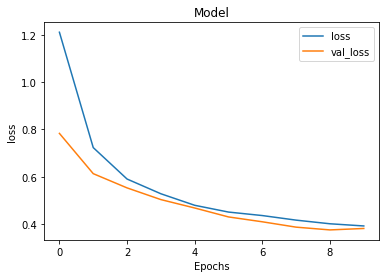

In [13]:
plot(history=history, metric='loss')